In [1]:
from _operator import attrgetter
import math

from PIL import Image, ImageColor
import IPython.display

from Position import Position
from Piece import Piece
from Board import Board
from Game import Game
import random


# See Game.py to check, how an implementation of a bot should look like so that it can play games in Engine

# A simple bot, which chooses the first white piece and moves it one field forward-right,
# without checking if it's a correct move.
# It usually looses after a few moves when it attempts to make an incorrect move
class SampleBot:
    def make_move(self, board):
        piece = board.whites[0]
        return [piece.position(), piece.position().add(1, 1)]


class SampleBotOne:
    def make_move(self, board):
        if len(board.whites) > 0:
            piece = board.whites[1]
        else:
            piece = board.whites[0]
        return [piece.position(), piece.position().add(1, 1)]

class AlfaBetaBot:
    def __init__(self, max_depth):
        self.max_depth = max_depth
    def heuristic_state_value(self, board):
        white_kings = 0.0
        black_kings = 0.0
        for white in board.whites:
            white_kings += white.king
        for black in board.blacks:
            black_kings += black.king
        kings = black_kings + white_kings
        return (len(board.whites) + white_kings) / (len(board.whites) + len(board.blacks) + kings)

    def min_max(self, board, depth = 0, best = 0.0, worse = 1.0):
        if depth == self.max_depth:
            return self.heuristic_state_value(board)
        if depth % 2 == 0:
            value = 0.0
            res_move = []
            sorted_moves = ((self.heuristic_state_value(board.make_move(move)), move) for move in board.possible_moves())
            sorted_moves = sorted(sorted_moves, key=lambda x: x[0])
            for (_, move) in sorted_moves:
                child_value = self.min_max(board.make_move(move), depth + 1, best, worse)
                best = max(best, child_value)
                if child_value >= worse:
                    value = child_value
                    res_move = move
                    break
                if child_value >= value:
                    if child_value > value:
                        res_move = move
                    value = child_value
        else:
            value = 1.0
            res_move = []
            sorted_moves = ((self.heuristic_state_value(board.make_move(move)), move) for move in board.possible_moves())
            sorted_moves = sorted(sorted_moves, key=lambda x: 1 - x[0])
            for (_, move) in sorted_moves:
                child_value = self.min_max(board.make_move(move), depth + 1, best, worse)
                worse = min(worse, child_value)
                if child_value <= best:
                    value = child_value
                    res_move = move
                    break
                if child_value <= value:
                    if child_value < value:
                        res_move = move
                    value = child_value
        if depth == 0:
            return res_move
        return value
    def make_move(self, state):
        return self.min_max(state)

class AlfaBetaBot2:
    def __init__(self, max_depth):
        self.max_depth = max_depth
    def heuristic_state_value(self, board):
        white_kings = 0.0
        black_kings = 0.0
        for white in board.whites:
            white_kings += white.king
        for black in board.blacks:
            black_kings += black.king
        kings = black_kings + white_kings
        return (len(board.whites) + white_kings) / (len(board.whites) + len(board.blacks) + kings)

    def min_max(self, board, depth = 0, best = 0.0, worse = 1.0):
        if depth == self.max_depth:
            return self.heuristic_state_value(board)
        if depth % 2 == 0:
            value = 0.0
            res_move = []
            sorted_moves = ((self.heuristic_state_value(board.make_move(move)), move) for move in board.possible_moves())
            sorted_moves = sorted(sorted_moves, key=lambda x: x[0])
            for (_, move) in sorted_moves:
                child_value = self.min_max(board.make_move(move), depth + 1, best, worse)
                best = max(best, child_value)
                if child_value >= worse:
                    value = child_value
                    res_move = move
                    break
                if child_value >= value:
                    if child_value > value or random.randint(1, 10) > 5:
                        res_move = move
                    value = child_value
        else:
            value = 1.0
            res_move = []
            sorted_moves = ((self.heuristic_state_value(board.make_move(move)), move) for move in board.possible_moves())
            sorted_moves = sorted(sorted_moves, key=lambda x: 1 - x[0])
            for (_, move) in sorted_moves:
                child_value = self.min_max(board.make_move(move), depth + 1, best, worse)
                worse = min(worse, child_value)
                if child_value <= best:
                    value = child_value
                    res_move = move
                    break
                if child_value <= value:
                    if child_value < value or random.randint(1, 10) > 5:
                        res_move = move
                    value = child_value
        if depth == 0:
            return res_move
        return value
    def make_move(self, state):
        return self.min_max(state)
# moves = board.possible_moves()
# for move in moves:
#     print(move)
#     board.revert().show()
#     board.make_move(move).show()

In [2]:
# # Suppose you have a class SampleBot and want to play againt it. Run:
# bot = MinMaxBot(4)
# game = Game(bot, None)
# game.play_human(False, True)

# When you are asked to specify your move in a textfield, specify it similarly as in a bot.
# However, don't wrap the locations into Positions class or a list - just list the numbers.
# For instance, to move from position (2, 0) to position (3, 1) just type: 2 0 3 1
# Also, remember that we firstly specify the row number and then the column number
# and that the upper-left field is (0, 0)
# board = Board()
# board = board.empty_board()
# board.world[1][3] = board.newWhite(1,3, True)
# board.world[2][2] = board.newBlack(2,2)
# board.world[2][4] = board.newBlack(2,4)
# board.world[4][4] = board.newBlack(4,4)
# board.world[4][2] = board.newBlack(4,2)
# moves = board.possible_moves()
# for move in moves:
#     board.revert().show()
#     board.make_move(move).show()

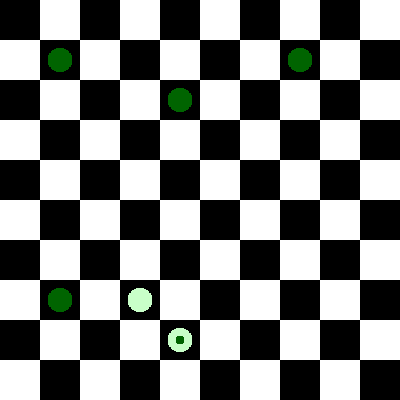

In [ ]:
# # Suppose you have classes SampleBot, SampleBotOne and want them to play against each other. Run:
bot = AlfaBetaBot(5)
botOne = AlfaBetaBot2(3)
game = Game(bot, botOne)
game.play_bots()
# w = 0
# b = 0
# for x in range(1, 10):
#     game = Game(bot, botOne)
#     game.play_bots()
#     # if res['winner'] == 'white':
#     #     w += 1
#     # else:
#     #     b += 1
#     print(w)
#     print(b)
